Financial Institutions play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. Historical data are provided on 250,000 borrowers. The goal of this competition is to build a model that borrowers can use to help make the best financial decisions. Hence, improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. The dataset is highly unbalanced, the positive class (defaults) account for 6.684% of all transactions.

0 : Not deliquent (no default) ; 1: Deliquency (default)

Import the libraries

In [ ]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

Import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_dataset = pd.read_csv('/content/drive/My Drive/cs-training.csv')
test_dataset = pd.read_csv('/content/drive/My Drive/cs-test.csv')


In [ ]:
train_dataset = train_dataset.drop(columns={'Unnamed: 0'})
test_dataset = test_dataset.drop(columns={'Unnamed: 0', 'SeriousDlqin2yrs'})

In [ ]:
train_dataset.shape, test_dataset.shape

((150000, 11), (101503, 10))

Data Exploration/ Preprocessing

In [ ]:
train_dataset.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train_dataset.describe().T
#to check if our dataset is balanced, we look at the mean for SeriousDlqin2yrs feature, 0.066

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


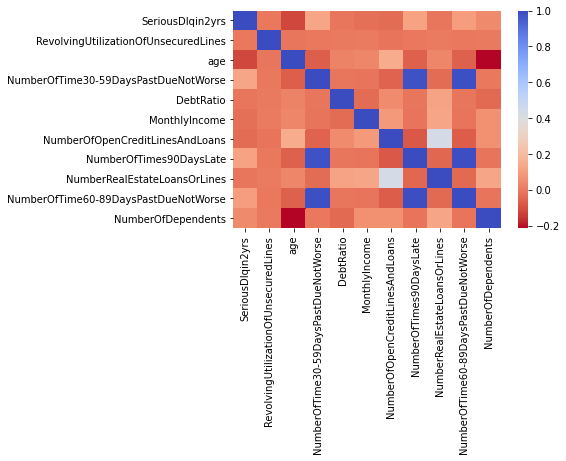

In [ ]:
#Heatmap Repr
corr = train_dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

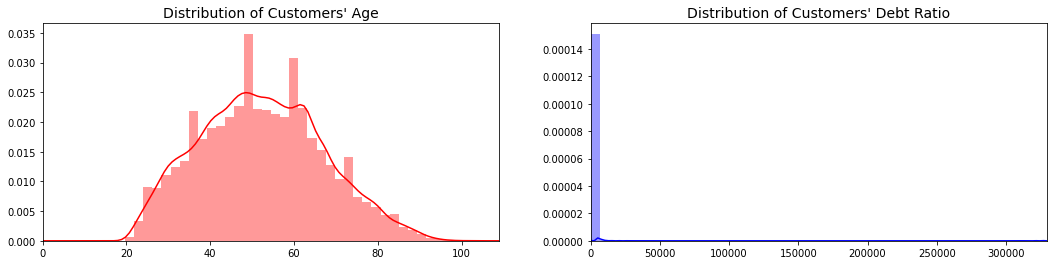

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

age_val = train_dataset['age'].values
DebtRatio_val = train_dataset['DebtRatio'].values
MonthlyIncome_val = train_dataset['MonthlyIncome'].values
NumberOfOpenCreditLinesAndLoans_val = train_dataset['NumberOfOpenCreditLinesAndLoans'].values
RevolvingUtilizationOfUnsecuredLines_val = train_dataset['RevolvingUtilizationOfUnsecuredLines'].values

sns.distplot(age_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Customers\' Age', fontsize=14)
ax[0].set_xlim([min(age_val), max(age_val)])

sns.distplot(DebtRatio_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Customers\' Debt Ratio', fontsize=14)
ax[1].set_xlim([min(DebtRatio_val), max(DebtRatio_val)])


plt.show()

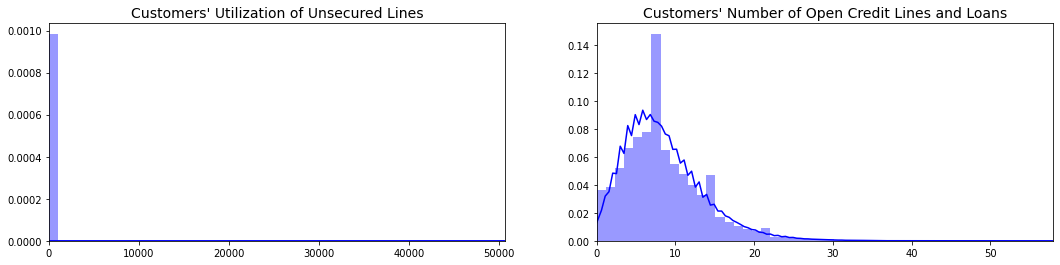

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(18,4))

sns.distplot(RevolvingUtilizationOfUnsecuredLines_val, ax=ax[0], color='b')
ax[0].set_title('Customers\' Utilization of Unsecured Lines', fontsize=14)
ax[0].set_xlim([min(RevolvingUtilizationOfUnsecuredLines_val), max(RevolvingUtilizationOfUnsecuredLines_val)])

sns.distplot(NumberOfOpenCreditLinesAndLoans_val, ax=ax[1], color='b')
ax[1].set_title('Customers\' Number of Open Credit Lines and Loans', fontsize=14)
ax[1].set_xlim([min(NumberOfOpenCreditLinesAndLoans_val), max(NumberOfOpenCreditLinesAndLoans_val)])

plt.show()

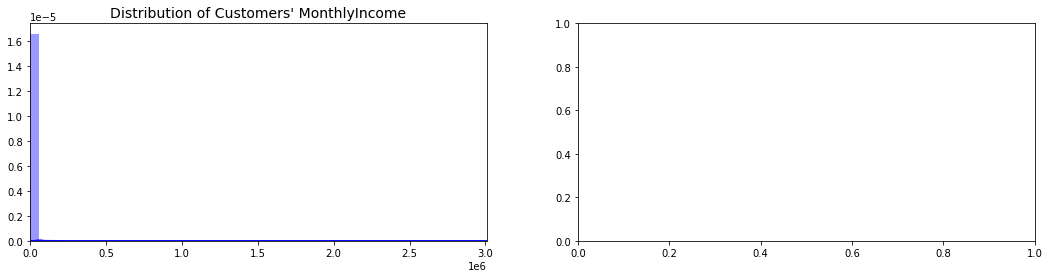

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(MonthlyIncome_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Customers\' MonthlyIncome', fontsize=14)
ax[0].set_xlim([min(MonthlyIncome_val), max(MonthlyIncome_val)])

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train_dataset['scaled_age'] = std_scaler.fit_transform(train_dataset['age'].values.reshape(-1,1))
train_dataset['scaled_RevolvingUtilizationOfUnsecuredLines'] = std_scaler.fit_transform(train_dataset['RevolvingUtilizationOfUnsecuredLines'].values.reshape(-1,1))
train_dataset['scaled_DebtRatio'] = std_scaler.fit_transform(train_dataset['DebtRatio'].values.reshape(-1,1))
train_dataset['scaled_MonthlyIncome'] = std_scaler.fit_transform(train_dataset['MonthlyIncome'].values.reshape(-1,1))
train_dataset['scaled_NumberOfOpenCreditLinesAndLoans'] = std_scaler.fit_transform(train_dataset['NumberOfOpenCreditLinesAndLoans'].values.reshape(-1,1))

train_dataset.drop(['age','RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], axis=1, inplace=True)

In [ ]:
scaled_age = train_dataset['scaled_age']
scaled_RevolvingUtilizationOfUnsecuredLines = train_dataset['scaled_RevolvingUtilizationOfUnsecuredLines']
scaled_DebtRatio = train_dataset['scaled_DebtRatio']
scaled_MonthlyIncome = train_dataset['scaled_MonthlyIncome']
scaled_NumberOfOpenCreditLinesAndLoans = train_dataset['scaled_NumberOfOpenCreditLinesAndLoans']

train_dataset.drop(['scaled_age', 'scaled_RevolvingUtilizationOfUnsecuredLines', 'scaled_DebtRatio', 'scaled_MonthlyIncome', 'scaled_NumberOfOpenCreditLinesAndLoans'], axis=1, inplace=True)

train_dataset.insert(1, 'scaled_age', scaled_age)
train_dataset.insert(2, 'scaled_RevolvingUtilizationOfUnsecuredLines', scaled_RevolvingUtilizationOfUnsecuredLines)
train_dataset.insert(3, 'scaled_DebtRatio', scaled_DebtRatio)
train_dataset.insert(4, 'scaled_MonthlyIncome', scaled_MonthlyIncome)
train_dataset.insert(5, 'scaled_NumberOfOpenCreditLinesAndLoans', scaled_NumberOfOpenCreditLinesAndLoans)

# Amount and Time are Scaled!

train_dataset.head()

,SeriousDlqin2yrs,scaled_age,scaled_RevolvingUtilizationOfUnsecuredLines,scaled_DebtRatio,scaled_MonthlyIncome,scaled_NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,-0.493860,-0.021150,-0.172833,0.170305,0.883657,2,0,6,0,2.0
1,0,-0.832342,-0.020385,-0.173168,-0.282957,-0.865297,0,0,0,0,1.0
2,0,-0.967735,-0.021582,-0.173186,-0.252229,-1.253953,1,1,0,0,0.0
3,0,-1.509307,-0.023281,-0.173210,-0.234293,-0.670969,0,0,0,0,0.0
4,0,-0.223074,-0.020585,-0.173215,3.956851,-0.282312,1,0,1,0,0.0


In [ ]:
train_dataset.columns

Index(['SeriousDlqin2yrs', 'scaled_age',
       'scaled_RevolvingUtilizationOfUnsecuredLines', 'scaled_DebtRatio',
       'scaled_MonthlyIncome', 'scaled_NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
test_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
age,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
MonthlyIncome,81400.0,6855.035590,36508.600375,0.0,3408.000000,5400.000000,8200.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0
NumberOfTime60-89DaysPastDueNotWorse,101503.0,0.270317,4.503578,0.0,0.000000,0.000000,0.000000,98.0
NumberOfDependents,98877.0,0.769046,1.136778,0.0,0.000000,0.000000,1.000000,43.0


In [ ]:
test_dataset['scaled_age'] = std_scaler.fit_transform(test_dataset['age'].values.reshape(-1,1))
test_dataset['scaled_RevolvingUtilizationOfUnsecuredLines'] = std_scaler.fit_transform(test_dataset['RevolvingUtilizationOfUnsecuredLines'].values.reshape(-1,1))
test_dataset['scaled_DebtRatio'] = std_scaler.fit_transform(test_dataset['DebtRatio'].values.reshape(-1,1))
test_dataset['scaled_MonthlyIncome'] = std_scaler.fit_transform(test_dataset['MonthlyIncome'].values.reshape(-1,1))
test_dataset['scaled_NumberOfOpenCreditLinesAndLoans'] = std_scaler.fit_transform(test_dataset['NumberOfOpenCreditLinesAndLoans'].values.reshape(-1,1))

test_dataset.drop(['age','RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], axis=1, inplace=True)

In [ ]:
scaled_age = test_dataset['scaled_age']
scaled_RevolvingUtilizationOfUnsecuredLines = test_dataset['scaled_RevolvingUtilizationOfUnsecuredLines']
scaled_DebtRatio = test_dataset['scaled_DebtRatio']
scaled_MonthlyIncome = test_dataset['scaled_MonthlyIncome']
scaled_NumberOfOpenCreditLinesAndLoans = test_dataset['scaled_NumberOfOpenCreditLinesAndLoans']

test_dataset.drop(['scaled_age', 'scaled_RevolvingUtilizationOfUnsecuredLines', 'scaled_DebtRatio', 'scaled_MonthlyIncome', 'scaled_NumberOfOpenCreditLinesAndLoans'], axis=1, inplace=True)

test_dataset.insert(1, 'scaled_age', scaled_age)
test_dataset.insert(2, 'scaled_RevolvingUtilizationOfUnsecuredLines', scaled_RevolvingUtilizationOfUnsecuredLines)
test_dataset.insert(3, 'scaled_DebtRatio', scaled_DebtRatio)
test_dataset.insert(4, 'scaled_MonthlyIncome', scaled_MonthlyIncome)
test_dataset.insert(5, 'scaled_NumberOfOpenCreditLinesAndLoans', scaled_NumberOfOpenCreditLinesAndLoans)


In [ ]:
test_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfTime30-59DaysPastDueNotWorse,101503.0,4.537698e-01,4.538487,0.000000,0.000000,0.000000,0.000000,98.000000
scaled_age,101503.0,4.380165e-17,1.000005,-2.124906,-0.771697,-0.027432,0.716833,3.490911
scaled_RevolvingUtilizationOfUnsecuredLines,101503.0,-2.471239e-16,1.000005,-0.027070,-0.026917,-0.026293,-0.024194,111.216548
scaled_DebtRatio,101503.0,-8.312508e-17,1.000005,-0.210999,-0.210893,-0.210776,-0.210478,164.145307
scaled_MonthlyIncome,81400.0,3.374553e-17,1.000006,-0.187766,-0.094418,-0.039855,0.036840,211.462294
scaled_NumberOfOpenCreditLinesAndLoans,101503.0,6.704018e-16,1.000005,-1.643350,-0.671358,-0.088162,0.495033,14.880515
NumberOfTimes90DaysLate,101503.0,2.966907e-01,4.515859,0.000000,0.000000,0.000000,0.000000,98.000000
NumberRealEstateLoansOrLines,101503.0,1.013074e+00,1.110253,0.000000,0.000000,1.000000,2.000000,37.000000
NumberOfTime60-89DaysPastDueNotWorse,101503.0,2.703171e-01,4.503578,0.000000,0.000000,0.000000,0.000000,98.000000
NumberOfDependents,98877.0,7.690464e-01,1.136778,0.000000,0.000000,0.000000,1.000000,43.000000


SeriousDlqin2yrs is the target variable (label), it is binary. The training set contains 150,000 observations of 11 features and 1 label. All of our features are numerical in nature. NumberOfDependents and MonthlyIncome contain NaN values.

In [ ]:
test_dataset.isnull().sum()

NumberOfTime30-59DaysPastDueNotWorse               0
scaled_age                                         0
scaled_RevolvingUtilizationOfUnsecuredLines        0
scaled_DebtRatio                                   0
scaled_MonthlyIncome                           20103
scaled_NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                            0
NumberRealEstateLoansOrLines                       0
NumberOfTime60-89DaysPastDueNotWorse               0
NumberOfDependents                              2626
dtype: int64

How is our target distributed?

In [ ]:
# Display no frauds an frauds case
print('No Defaults', round(train_dataset['SeriousDlqin2yrs'].value_counts()[0]/len(train_dataset) * 100,2), '% of the dataset')
print('Defaults', round(train_dataset['SeriousDlqin2yrs'].value_counts()[1]/len(train_dataset) * 100,2), '% of the dataset')

No Defaults 93.32 % of the dataset
Defaults 6.68 % of the dataset


In [ ]:
print(train_dataset['SeriousDlqin2yrs'].value_counts()[0])
print(train_dataset['SeriousDlqin2yrs'].value_counts()[1])

139974
10026


Text(0.5, 1.0, "Imbalance in the Dataset's Target")

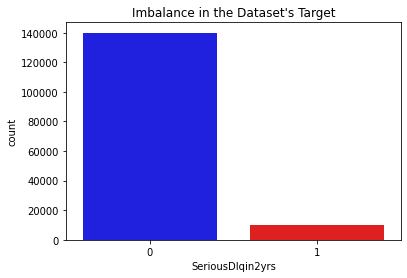

In [ ]:
colors = ["b", "r"]  

sns.countplot('SeriousDlqin2yrs', data=train_dataset, palette=colors)
plt.title('Imbalance in the Dataset\'s Target')

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples

train_dataset = train_dataset.sample(frac=1)

# amount of fraud classes 10026 rows.
default_df = train_dataset.loc[train_dataset['SeriousDlqin2yrs'] == 1]
non_default_df = train_dataset.loc[train_dataset['SeriousDlqin2yrs'] == 0][:10026]

normal_distributed_df = pd.concat([default_df, non_default_df])

# Shuffle dataframe rows
new_train_dataset = normal_distributed_df.sample(frac=1, random_state=42)

new_train_dataset.head()

,SeriousDlqin2yrs,scaled_age,scaled_RevolvingUtilizationOfUnsecuredLines,scaled_DebtRatio,scaled_MonthlyIncome,scaled_NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
62136,0,0.792373,-0.023436,-0.073120,NaN,-1.253953,0,0,0,0,0.0
110106,1,-1.983182,-0.021032,-0.173114,-0.330646,0.300672,1,4,0,1,1.0
121936,0,-0.629253,-0.022012,-0.173046,0.231343,-1.059625,0,0,1,0,2.0
6603,0,1.469338,-0.024121,-0.173223,0.681894,4.187236,0,0,0,0,0.0
146209,0,-0.561556,-0.023919,-0.173066,-0.052432,0.300672,0,0,1,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Defaults', round(train_dataset['SeriousDlqin2yrs'].value_counts()[0]/len(train_dataset) * 100,2), '% of the dataset')
print('Defaults', round(train_dataset['SeriousDlqin2yrs'].value_counts()[1]/len(train_dataset) * 100,2), '% of the dataset')

original_X = train_dataset.drop('SeriousDlqin2yrs', axis=1)
original_y = train_dataset['SeriousDlqin2yrs']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, valid_index in sss.split(original_X, original_y):
    print("Train:", train_index, "Test:", valid_index)
    original_Xtrain, original_Xvalid = original_X.iloc[train_index], original_X.iloc[valid_index]
    original_ytrain, original_yvalid = original_y.iloc[train_index], original_y.iloc[valid_index]

No Defaults 93.32 % of the dataset
Defaults 6.68 % of the dataset
Train: [ 28968  28976  29105 ... 149997 149998 149999] Test: [    0     1     2 ... 30066 30067 30068]
Train: [     0      1      2 ... 149997 149998 149999] Test: [28968 28976 29105 ... 60172 60173 60174]
Train: [     0      1      2 ... 149997 149998 149999] Test: [57580 57597 57598 ... 90093 90094 90095]
Train: [     0      1      2 ... 149997 149998 149999] Test: [ 88622  88635  88681 ... 120028 120029 120030]
Train: [     0      1      2 ... 120028 120029 120030] Test: [119500 119531 119543 ... 149997 149998 149999]


In [ ]:
# Turn into an array
#original_Xtrain = original_Xtrain.values
#original_Xvalid = original_Xvalid.values
#original_ytrain = original_ytrain.values
#original_yvalid = original_yvalid.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
valid_unique_label, valid_counts_label = np.unique(original_yvalid, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(valid_counts_label/ len(original_yvalid))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.93316667 0.06683333]
[0.93313333 0.06686667]


Equal distributed and Correlation

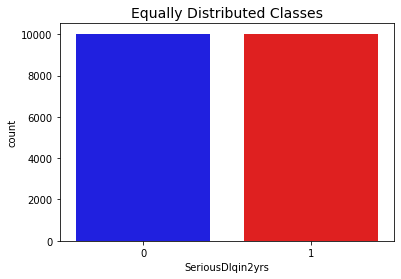

In [ ]:
sns.countplot('SeriousDlqin2yrs', data=new_train_dataset, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Correlation Matrices

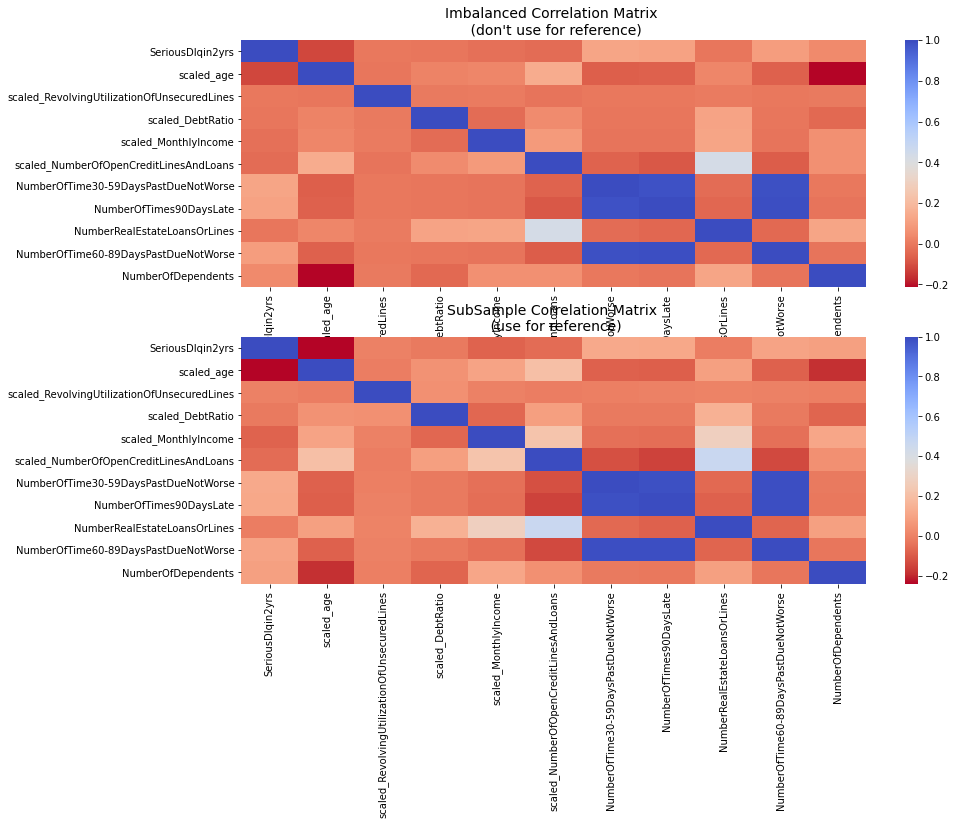

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))

# Entire DataFrame
corr = train_dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_train_dataset.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

From the above, we can see that the distribution of our target variable is very skewed.

Anomaly Detection

In [ ]:
# Lets check for outliers in the dataset
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(new_train_dataset,2,["scaled_RevolvingUtilizationOfUnsecuredLines",
                                            "scaled_age",
                                            "NumberOfTime30-59DaysPastDueNotWorse",
                                            "scaled_DebtRatio",
                                            "scaled_MonthlyIncome",
                                            "scaled_NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate",
                                            "NumberRealEstateLoansOrLines",
                                            "NumberOfTime60-89DaysPastDueNotWorse",
                                            "NumberOfDependents"])

In [ ]:
new_train_dataset.loc[Outliers_to_drop].head()

,SeriousDlqin2yrs,scaled_age,scaled_RevolvingUtilizationOfUnsecuredLines,scaled_DebtRatio,scaled_MonthlyIncome,scaled_NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
16642,1,-0.493860,0.034003,-0.172662,-0.204678,0.495001,3,0,2,7,3.0
115143,1,-0.832342,-0.005644,0.322893,NaN,-0.476640,2,0,0,1,0.0
63271,1,0.115409,-0.008753,-0.173215,-0.150871,-1.642610,0,2,0,2,0.0
67670,1,0.453891,0.025682,-0.172877,0.069295,0.106344,3,1,1,2,0.0
128980,1,-1.306218,-0.007903,-0.161450,NaN,-1.448281,1,1,0,0,0.0


We detected 3527 outliers in the training set, which represents 2.53% of our training data. We will drop these outliers.

In [ ]:
new_train_dataset = new_train_dataset.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
#merge the datasets
new_train_dataset_len = len(new_train_dataset)
dataset =  pd.concat(objs=[new_train_dataset, test_dataset], axis=0).reset_index(drop=True)

In [ ]:
dataset.shape

(120681, 11)

In [ ]:
dataset = dataset.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'scaled_age' : 'age',
                                  'scaled_RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'scaled_DebtRatio': 'DebtRatio',
                                  'scaled_MonthlyIncome': 'MonthlyIncome',
                                  'scaled_NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

train_dataset = new_train_dataset.rename(columns={'SeriousDlqin2yrs': 'Target',
                                  'scaled_age' : 'age',
                                  'scaled_RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'scaled_DebtRatio': 'DebtRatio',
                                  'scaled_MonthlyIncome': 'MonthlyIncome',
                                  'scaled_NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

test_dataset = test_dataset.rename(columns={'scaled_RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'scaled_age' : 'age',       
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'scaled_DebtRatio': 'DebtRatio',
                                  'scaled_MonthlyIncome': 'MonthlyIncome',
                                  'scaled_NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

Exploring Variables

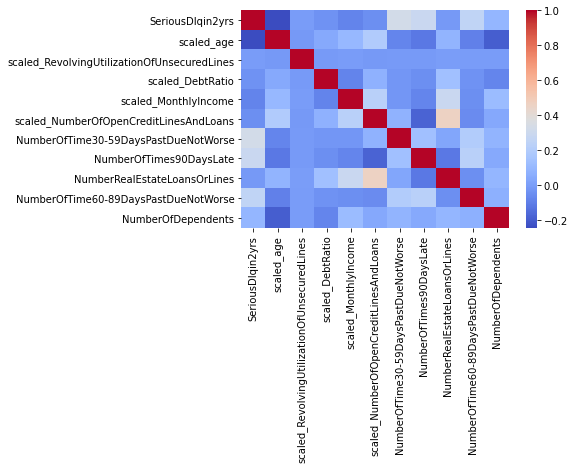

In [ ]:
# Correlation matrix
g = sns.heatmap(new_train_dataset.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

We can see that the Target has the highest correlation with age, previous late payments, and the number of dependants.

In [ ]:
#UInsecuredLines
dataset.UnsecLines.describe()

count    120681.000000
mean         -0.001437
std           0.936746
min          -0.027070
25%          -0.026853
50%          -0.025731
75%          -0.023256
max         111.216548
Name: UnsecLines, dtype: float64

In [ ]:
dataset.UnsecLines = pd.qcut(dataset.UnsecLines.values, 5).codes

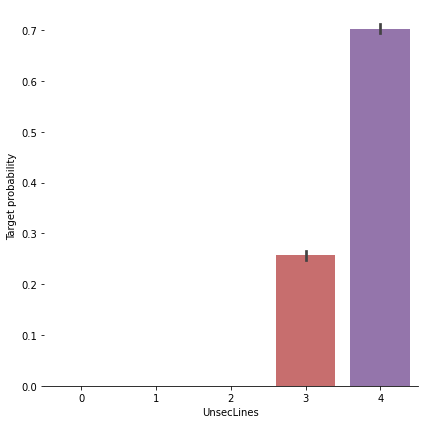

In [ ]:
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="UnsecLines",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

We can that there is an almost exponential relationship between this variable and our target

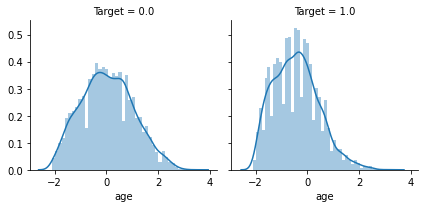

In [ ]:
# Explore Age vs Target
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "age")

In [ ]:
dataset.age = pd.qcut(dataset.age.values, 5).codes

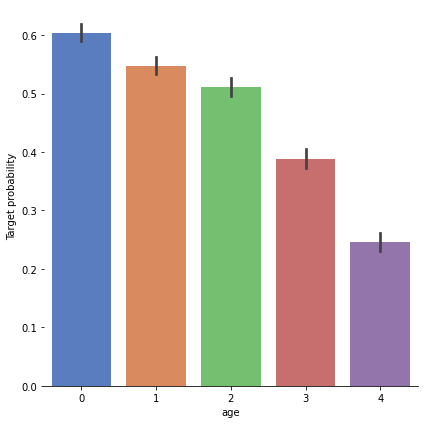

In [ ]:
# Explore age feature vs Target
g  = sns.factorplot(x="age",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")


We can see that age has an inverse relationship to default risk

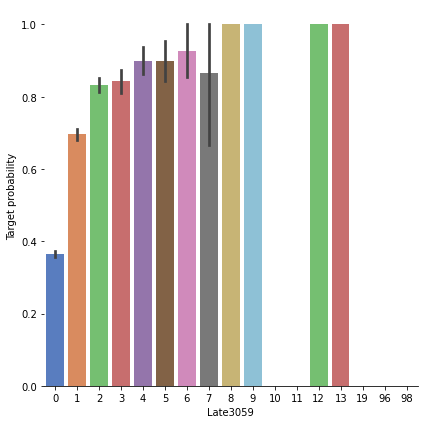

In [ ]:
# Explore Late3059 feature vs Target
g  = sns.factorplot(x="Late3059",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(dataset)):
    if dataset.Late3059[i] >= 6:
        dataset.Late3059[i] = 6

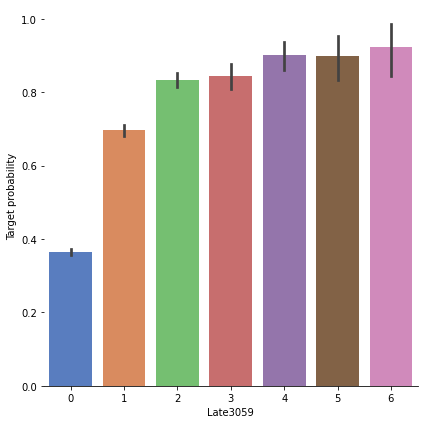

In [ ]:
# Explore Late3059 feature vs Target
g  = sns.factorplot(x="Late3059",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")


Due to very high standard deviations we decided to group customers who have 6 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late3059

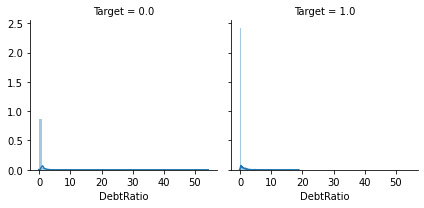

In [ ]:
# Explore DebtRatio vs Target
g = sns.FacetGrid(dataset, col='Target')
g = g.map(sns.distplot, "DebtRatio")

In [ ]:

dataset.DebtRatio = pd.qcut(dataset.DebtRatio.values, 5).codes

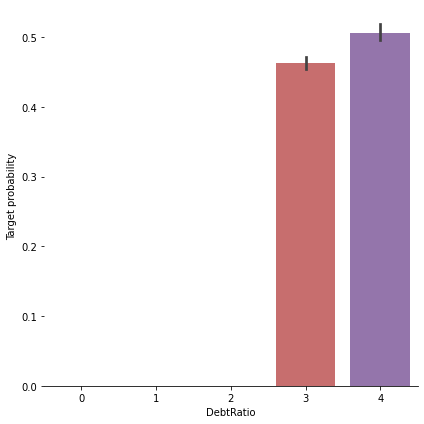

In [ ]:
# Explore DebtRatio feature quantiles vs Target
g  = sns.factorplot(x="DebtRatio",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
#Exploring MonthlyIncome
dataset.MonthlyIncome.isnull().sum()

23355

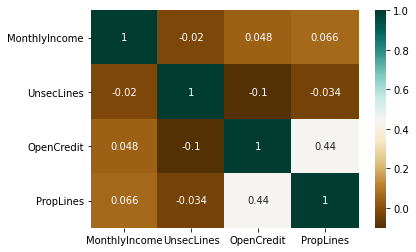

In [ ]:
g = sns.heatmap(dataset[["MonthlyIncome","UnsecLines","OpenCredit","PropLines"]].corr(),cmap="BrBG",annot=True)

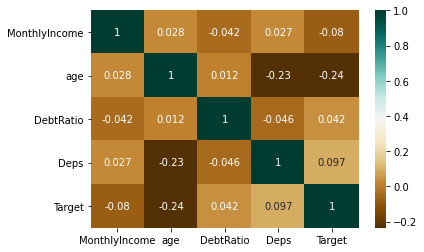

In [ ]:
g = sns.heatmap(dataset[["MonthlyIncome","age","DebtRatio","Deps","Target"]].corr(),cmap="BrBG",annot=True)

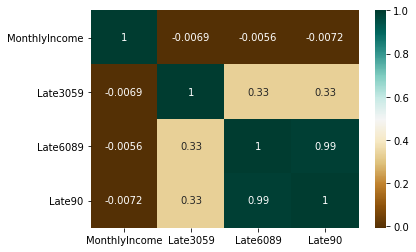

In [ ]:
g = sns.heatmap(dataset[["MonthlyIncome","Late3059","Late6089","Late90"]].corr(),cmap="BrBG",annot=True)

We can see that MonthlyIncome has no strong correlation with any other variable so we cannot accurately estimate the NaN values. Thus, we will fill the NaN with the median value

In [ ]:
dataset.MonthlyIncome.median()

-0.04633280823389137

In [ ]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset.MonthlyIncome = dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median())

In [ ]:
dataset.MonthlyIncome = pd.qcut(dataset.MonthlyIncome.values, 5).codes

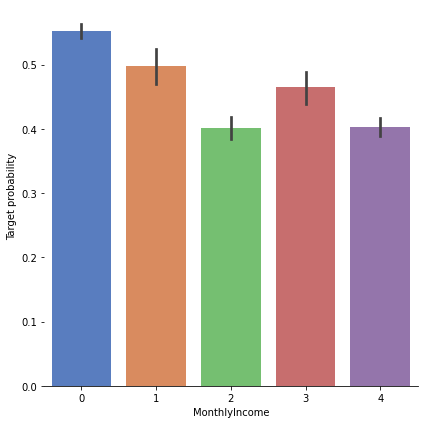

In [ ]:
# Explore MonthlyIncome feature quantiles vs Target
g  = sns.factorplot(x="MonthlyIncome",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
#Exploring OpenCredit
dataset.OpenCredit.describe()

count    120681.000000
mean         -0.007269
std           1.006232
min          -1.643350
25%          -0.671358
50%          -0.088162
75%           0.495033
max          14.880515
Name: OpenCredit, dtype: float64

In [ ]:
dataset.OpenCredit = pd.qcut(dataset.OpenCredit.values, 5).codes

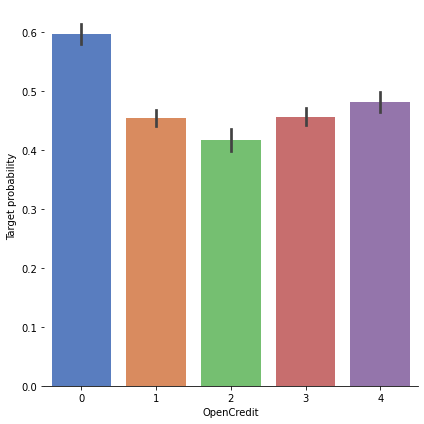

In [ ]:
# Explore OpenCredit feature vs Target
g  = sns.factorplot(x="OpenCredit",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
# Explore Late90 feature vs Target
dataset.Late90.describe()

count    120681.000000
mean          0.297122
std           4.157202
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: Late90, dtype: float64

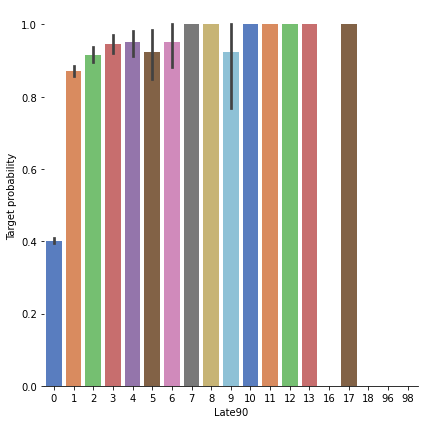

In [ ]:
# Explore Late90 vs Target
g  = sns.factorplot(x="Late90",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(dataset)):
    if dataset.Late90[i] >= 5:
        dataset.Late90[i] = 5

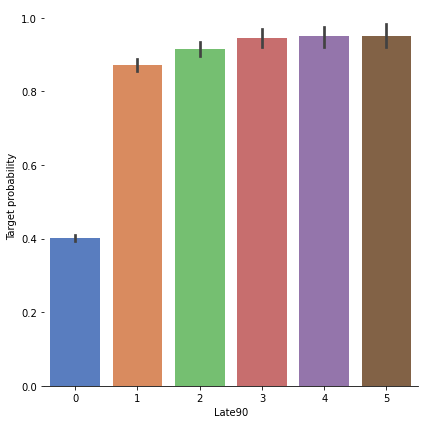

In [ ]:
# Explore Late90 feature quantiles vs Target
g  = sns.factorplot(x="Late90",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
#Explore Proplines
dataset.PropLines.describe()

count    120681.000000
mean          1.010756
std           1.127753
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          37.000000
Name: PropLines, dtype: float64

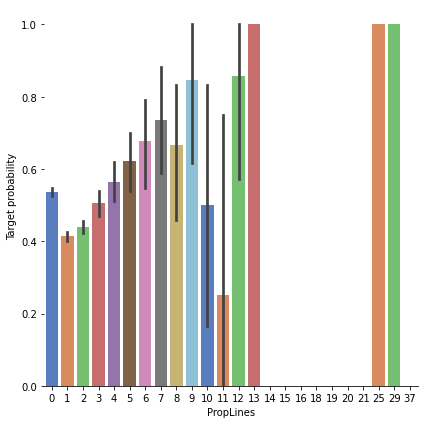

In [ ]:
# Explore Proplines feature vs Target
g  = sns.factorplot(x="PropLines",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:

for i in range(len(dataset)):
    if dataset.PropLines[i] >= 6:
        dataset.PropLines[i] = 6

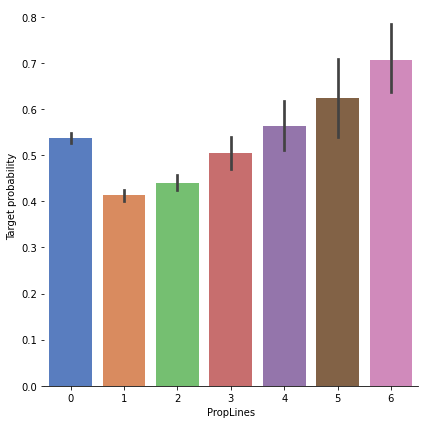

In [ ]:
# Explore Proplines feature vs Target
g  = sns.factorplot(x="PropLines",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

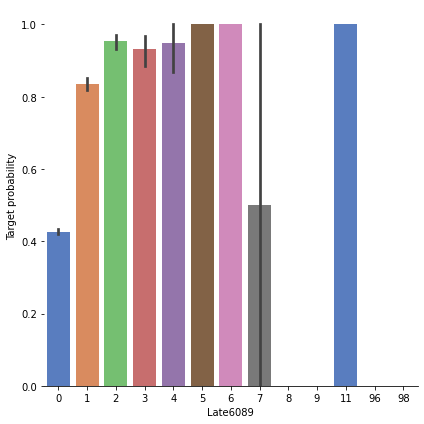

In [ ]:
# Explore Late6089 feature quantiles vs Target
g  = sns.factorplot(x="Late6089",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(dataset)):
    if dataset.Late6089[i] >= 3:
        dataset.Late6089[i] = 3

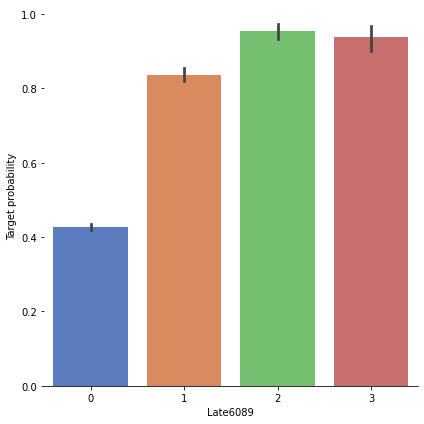

In [ ]:
# Explore Late6089 feature quantiles vs Target
g  = sns.factorplot(x="Late6089",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
#Exploring Deps
dataset.Deps.describe()

count    117631.000000
mean          0.781903
std           1.141259
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          43.000000
Name: Deps, dtype: float64

In [ ]:
dataset.Deps = dataset.Deps.fillna(dataset.Deps.median())

In [ ]:
dataset.Deps.isnull().sum()

0

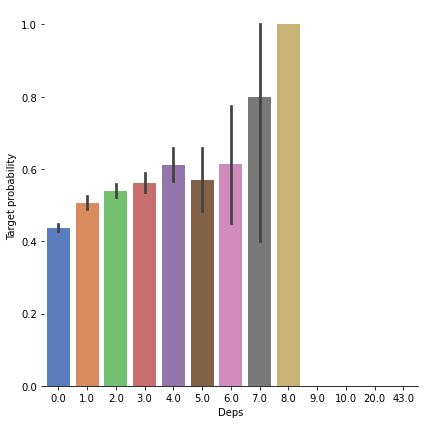

In [ ]:
# Explore Deps feature quantiles vs Target
g  = sns.factorplot(x="Deps",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
for i in range(len(dataset)):
    if dataset.Deps[i] >= 4:
        dataset.Deps[i] = 4

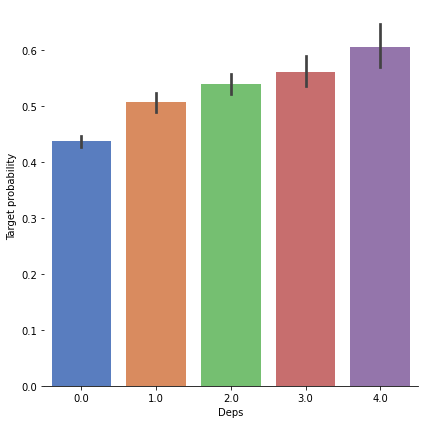

In [ ]:
# Explore Deps feature quantiles vs Target
g  = sns.factorplot(x="Deps",y="Target",data=dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
#Final NAN chaeck
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120681 entries, 0 to 120680
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Target         19178 non-null   float64
 1   age            120681 non-null  int8   
 2   UnsecLines     120681 non-null  int8   
 3   DebtRatio      120681 non-null  int8   
 4   MonthlyIncome  120681 non-null  int8   
 5   OpenCredit     120681 non-null  int8   
 6   Late3059       120681 non-null  int64  
 7   Late90         120681 non-null  int64  
 8   PropLines      120681 non-null  int64  
 9   Late6089       120681 non-null  int64  
 10  Deps           120681 non-null  float64
dtypes: float64(2), int64(4), int8(5)
memory usage: 6.1 MB


In [ ]:
dataset.drop_duplicates

<bound method DataFrame.drop_duplicates of         Target  age  UnsecLines  DebtRatio  ...  Late90  PropLines  Late6089  Deps
0          0.0    3           3          4  ...       0          0         0   0.0
1          1.0    0           4          3  ...       4          0         1   1.0
2          0.0    1           4          3  ...       0          1         0   2.0
3          0.0    4           3          3  ...       0          0         0   0.0
4          0.0    1           3          3  ...       0          1         0   1.0
...        ...  ...         ...        ...  ...     ...        ...       ...   ...
120676     NaN    0           2          0  ...       0          0         0   0.0
120677     NaN    0           4          3  ...       0          2         0   4.0
120678     NaN    4           1          4  ...       0          0         0   0.0
120679     NaN    2           2          4  ...       0          2         1   3.0
120680     NaN    0           2          1  

In [ ]:
dataset.isnull().sum().max()

101503

In [ ]:
dataset.shape

(120681, 11)

In [ ]:
#Buidling dummy/binary variables
dataset = pd.get_dummies(dataset, columns = ["UnsecLines"], prefix="UnsecLines")
dataset = pd.get_dummies(dataset, columns = ["age"], prefix="age")
dataset = pd.get_dummies(dataset, columns = ["Late3059"], prefix="Late3059")
dataset = pd.get_dummies(dataset, columns = ["DebtRatio"], prefix="DebtRatio")
dataset = pd.get_dummies(dataset, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
dataset = pd.get_dummies(dataset, columns = ["OpenCredit"], prefix="OpenCredit")
dataset = pd.get_dummies(dataset, columns = ["Late90"], prefix="Late90")
dataset = pd.get_dummies(dataset, columns = ["PropLines"], prefix="PropLines")
dataset = pd.get_dummies(dataset, columns = ["Late6089"], prefix="Late6089")
dataset = pd.get_dummies(dataset, columns = ["Deps"], prefix="Deps")

In [ ]:
dataset.head()

,Target,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,age_4,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
0,0.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


Building Our Credit Scoring Model

In [ ]:
train_dataset = dataset[:new_train_dataset_len]
test_dataset = dataset[new_train_dataset_len:]
test_dataset.drop(labels=["Target"],axis = 1,inplace=True)
test_dataset.head()

,UnsecLines_0,UnsecLines_1,UnsecLines_2,UnsecLines_3,UnsecLines_4,age_0,age_1,age_2,age_3,age_4,Late3059_0,Late3059_1,Late3059_2,Late3059_3,Late3059_4,Late3059_5,Late3059_6,DebtRatio_0,DebtRatio_1,DebtRatio_2,DebtRatio_3,DebtRatio_4,MonthlyIncome_0,MonthlyIncome_1,MonthlyIncome_2,MonthlyIncome_3,MonthlyIncome_4,OpenCredit_0,OpenCredit_1,OpenCredit_2,OpenCredit_3,OpenCredit_4,Late90_0,Late90_1,Late90_2,Late90_3,Late90_4,Late90_5,PropLines_0,PropLines_1,PropLines_2,PropLines_3,PropLines_4,PropLines_5,PropLines_6,Late6089_0,Late6089_1,Late6089_2,Late6089_3,Deps_0.0,Deps_1.0,Deps_2.0,Deps_3.0,Deps_4.0
19178,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
19179,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
19180,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
19181,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
19182,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
test_dataset.shape, train_dataset.shape

((101503, 54), (19178, 55))

In [ ]:
## Separate train features and label 
train_dataset["Target"] = train_dataset["Target"].astype(int)
y_train_dataset = train_dataset["Target"]
X_train_dataset = train_dataset.drop(labels = ["Target"],axis = 1)

In [ ]:
'''#Split training dataset to train and validation datasets
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_dataset,
                                                      y_train_dataset, 
                                                      test_size=0.30, 
                                                      random_state=123)

print(X_train.shape, X_valid.shape)'''

'#Split training dataset to train and validation datasets\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_valid, y_train, y_valid = train_test_split(X_train_dataset,\n                                                      y_train_dataset, \n                                                      test_size=0.30, \n                                                      random_state=123)\n\nprint(X_train.shape, X_valid.shape)'

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_train_dataset.drop('SeriousDlqin2yrs', axis=1)
y = new_train_dataset['SeriousDlqin2yrs']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_valid = X_valid.values
y_train = y_train.values
y_valid = y_valid.values

# Let's implement simple classifiers: Logistic Regression, KNeighborsClassifier, SVC, Decision Tree Classifier
print(type(X_train))

<class 'numpy.ndarray'>


Dimensionality Reduction and Clustering:

In [ ]:
# T-SNE Implementation
t0 = time.time()
X_train_dataset_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train_dataset.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_train_dataset_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_dataset.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_train_dataset_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_train_dataset.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.3e+02 s
PCA took 0.15 s
Truncated SVD took 0.18 s


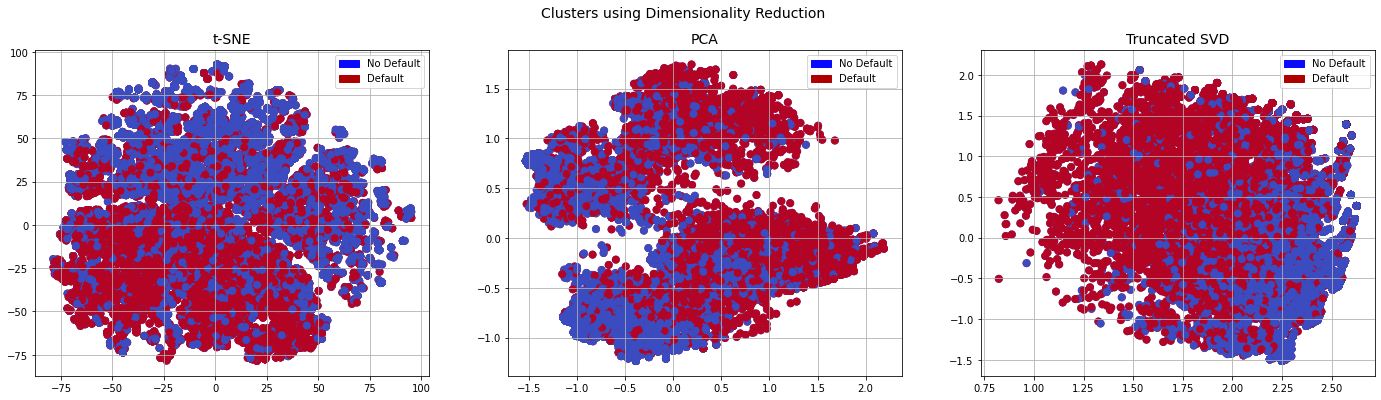

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Default', 'Default']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Default')
red_patch = mpatches.Patch(color='#AF0000', label='Default')

# t-SNE scatter plot
ax1.scatter(X_train_dataset_reduced_tsne[:,0], X_train_dataset_reduced_tsne[:,1], c=(y_train_dataset == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax1.scatter(X_train_dataset_reduced_tsne[:,0], X_train_dataset_reduced_tsne[:,1], c=(y_train_dataset == 1), cmap='coolwarm', label='Default', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_train_dataset_reduced_pca[:,0], X_train_dataset_reduced_pca[:,1], c=(y_train_dataset == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax2.scatter(X_train_dataset_reduced_pca[:,0], X_train_dataset_reduced_pca[:,1], c=(y_train_dataset == 1), cmap='coolwarm', label='Default', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_train_dataset_reduced_svd[:,0], X_train_dataset_reduced_svd[:,1], c=(y_train_dataset == 0), cmap='coolwarm', label='No Default', linewidths=2)
ax3.scatter(X_train_dataset_reduced_svd[:,0], X_train_dataset_reduced_svd[:,1], c=(y_train_dataset == 1), cmap='coolwarm', label='Default', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Classifiers (UnderSampling):

In this section we will train four types of classifiers and decide which classifier will be more effective in determining the likelihood of default in 2 years. 

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

AttributeError: ignored

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
# We will undersample during cross validating
undersample_X = train_dataset.drop('Target', axis=1)
undersample_y = train_dataset['Target']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xvalid = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_yvalid = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xvalid = undersample_Xvalid.values
undersample_ytrain = undersample_ytrain.values
undersample_yvalid = undersample_yvalid.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

In [ ]:
# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, valid_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator 
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, valid_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, valid_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, valid_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

In [ ]:
'''cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)'''

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

In [ ]:
#undersample_y_score = log_reg.decision_function(original_Xvalid)

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_yvalid, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_yvalid, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xvalid), len(original_yvalid)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
  pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
  model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
  best_est = rand_log_reg.best_estimator_
  prediction = best_est.predict(original_Xtrain[test])
    
  accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
  precision_lst.append(precision_score(original_ytrain[test], prediction))
  recall_lst.append(recall_score(original_ytrain[test], prediction))
  f1_lst.append(f1_score(original_ytrain[test], prediction))
  auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_features='sqrt')
train_fit = rfc.fit(X_train, y_train)

features = pd.DataFrame()
features['feature'] = X_train_dataset.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [ ]:
features.plot(kind='barh', figsize=(17, 17))

Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(original_Xtrain)
X_valid = sc.transform(original_Xvalid)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.

log_reg = LogisticRegression()
log_reg.fit(original_Xtrain, original_ytrain)

Measure classification accuracy over the training/test sets.

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = log_reg.predict(original_Xtrain)
y_valid_pred = log_reg.predict(original_Xvalid)

print("Training Accuracy: {0:.2f}".format(accuracy_score(original_ytrain, y_train_pred)))
print("Validation Accuracy: {0:.2f}".format(accuracy_score(original_yvalid, y_valid_pred)))

Build a text report showing the main classification metrics including precision, recall, f1-score, and accuracy.

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(original_yvalid, y_valid_pred)   #use valid 
print(report)

 Compute and plot confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))

cm = confusion_matrix(original_yvalid, y_valid_pred)    #use valid
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");

In [ ]:
results_df = pd.read_csv('/content/drive/My Drive/cs-test.csv')

In [ ]:
results_df = results_df.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)

In [ ]:
parameters = {'n_estimators': 1000, 'random_state' : 20}
    
model = RandomForestClassifier(**parameters)
model.fit(original_Xtrain, original_ytrain)

In [ ]:
DefaultProb = model.predict_proba(test_dataset)
DefaultProb = DefaultProb[:,1]
results_df.SeriousDlqin2yrs = DefaultProb

results_df = results_df.rename(columns={'serial': 'Id',
                                        'Target': 'Probability'})

In [ ]:
results_df.head()

In [ ]:
path = '/content/drive/My Drive/'
results_df.to_csv(path + "CREDIT_SCORE_LOG.csv", index=False)

In [ ]:
results = pd.read_csv(path + 'CREDIT_SCORE_LOG.csv')
results.head(10)

Random Forest Model

In [ ]:
parameters = {'n_estimators': 50, 'random_state' : 20}   #alter
    
model = RandomForestClassifier(**parameters)
model.fit(original_Xtrain, original_ytrain)

Test/Predict the Model

In [ ]:
y_train_pred = model.predict(X_train)   
print("Training accuracy is:", accuracy_score(original_ytrain, y_train_pred)) 

y_valid_pred= model.predict(X_valid)   
print("Test accuracy is:",  accuracy_score(original_yvalid, y_valid_pred))

Improving model

In [ ]:
model = RandomForestClassifier(min_impurity_decrease=0.00001)    # further reduce the min impurity
model.fit(original_Xtrain, original_ytrain)  

y_train_pred = model.predict(original_Xtrain)   
print("Training accuracy is:", accuracy_score(original_ytrain, y_train_pred))

y_valid_pred = model.predict(original_Xvalid) 
print("Test accuracy is:", accuracy_score(original_yvalid, y_valid_pred))

Reduction in min impurity decrease improves the validation accuracy at the expense of the training accuracy.

Nonetheless, to find the best combination of hyperparameters, we are going to simply train the model on different combinations and pick the best combination of n_estimators and max_features and use.

In [ ]:
def train_for_comb(n_estimators, max_features):
  model = RandomForestClassifier(random_state=1, min_impurity_decrease=0.00001,
                                   n_estimators=n_estimators, max_features = max_features)
  model.fit(original_Xtrain, original_ytrain)
  y_train_pred = model.predict(original_Xtrain)
  train_accuracy = accuracy_score(original_ytrain, y_train_pred)
  y_valid_pred =  model.predict(original_Xvalid)
  test_accuracy =  accuracy_score(original_yvalid, y_valid_pred)   
  return ([train_accuracy, test_accuracy])
 
n_estimators_list = [50,100,200,300,500]
max_features_list = [int(i) for i in np.linspace(1,original_Xtrain.shape[1], 10)]

# dictionary to store accuracy scores for each combination   
accuracy_dic ={}

# loop to compute all accuracies
for n_estimators in n_estimators_list:
    for max_features in max_features_list:
      x = train_for_comb(n_estimators, max_features)
      accuracy_dic[(n_estimators, max_features)] = x
        
curr_max = 0
for i,j in accuracy_dic:
  (train, test) = accuracy_dic[(i,j)]
  if min(train, test) > curr_max:
    curr_max = min(train, test)

Optionally, instead of manually looking for the best we can look for the best split. Use GridSearchCV to find it

In [ ]:
'''from sklearn.model_selection import GridSearchCV

n_estimators = [int(i) for i in np.linspace(50, 1000, )]
total_features = original_Xtrain.shape[1]
max_features = [int(i) for i in np.linspace(1, total_features, 10)]
tuned_parameters = {
    'n_estimators': n_estimators,
    'max_features': max_features
} 

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=tuned_parameters, scoring = 'accuracy')
grid_search.fit(original_Xtrain, original_ytrain)

print('The best combination:', grid_search.best_params_)

y_valid_pred = grid_search.predict(original_Xvalid)
print('Test accuracy is:', accuracy_score(original_yvalid, y_valid_pred))'''

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Fit the data
mlp.fit(original_Xtrain, original_ytrain)
mlp.fit(original_Xvalid, original_yvalid)

print(mlp.score(original_Xtrain, original_ytrain))
print(mlp.score(original_Xvalid, original_yvalid))

Model Performance/Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train_pred, original_ytrain))
print('Validation Accuracy:', accuracy_score(y_valid_pred, original_yvalid))

Model Scores/Results

In [ ]:
results_df = pd.read_csv('/content/drive/My Drive/cs-test.csv')

In [ ]:
results_df = results_df.drop(["RevolvingUtilizationOfUnsecuredLines",
                             "age",
                             "NumberOfTime30-59DaysPastDueNotWorse",
                             "DebtRatio",
                             "MonthlyIncome",
                             "NumberOfOpenCreditLinesAndLoans",
                             "NumberOfTimes90DaysLate",
                             "NumberRealEstateLoansOrLines",
                             "NumberOfTime60-89DaysPastDueNotWorse",
                             "NumberOfDependents"], axis=1)

In [ ]:
DefaultProb = model.predict_proba(test_dataset)
DefaultProb = DefaultProb[:,1]
results_df.SeriousDlqin2yrs = DefaultProb

results_df = results_df.rename(columns={'serial': 'Id',
                                        'Target': 'Probability'})

In [ ]:
results_df.head()

In [ ]:
path = '/content/drive/My Drive/'
results_df.to_csv(path + "CREDIT_SCORE_RF.csv", index=False)

In [ ]:
results = pd.read_csv(path + 'CREDIT_SCORE_RF.csv')
results.head(10)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()  
model.fit(original_Xtrain, original_ytrain)

Use the fitted model to predict training data and check accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(original_Xtrain)
y_valid_pred =  model.predict(original_Xvalid)

print("Training accuracy is:", accuracy_score(y_train_pred, original_ytrain))
print('Validation Accuracy:', accuracy_score(y_valid_pred, original_yvalid))

Improving the model

In [ ]:
def train_pruned_tree(min_decrease):
  model = DecisionTreeClassifier(random_state=1, min_impurity_decrease = min_decrease) 
  model.fit(original_Xtrain, original_ytrain)
  y_train_pred = model.predict(original_Xtrain)  
  train_accuracy = accuracy_score(original_ytrain, y_train_pred) 
  y_valid_pred = model.predict(original_Xvalid)
  test_accuracy = accuracy_score(original_yvalid, y_valid_pred)  
  return ([train_accuracy, test_accuracy])

train_pruned_tree(0.001)

Here, we see that with prunning we gain some test accuracy but at a loss of a bit of the training accuracy.

We can also train multiple models using varying values of min_decrease in the function and plot two lines: one for training accuracy scores and another for test accuracy scores.

In [ ]:
min_decrease_list = 10**(np.array(range(10, -100, -5))/10)
x = [train_pruned_tree(min_decrease) for min_decrease in min_decrease_list]
y = np.array(x)
# get train and test accuracy scores for all values of min_decrease 
train_accuracies, test_accuracies = y[:,0], y[:,1] 
plt.plot(np.log10(min_decrease_list), train_accuracies, )
plt.plot(np.log10(min_decrease_list), test_accuracies )
# plot lines 
plt.legend('Train', 'Test')
plt.xlabel('Logarithmic Scale of min_decrease')
plt.ylabel('Accuracy Scores')

Build a Neural Network